In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset/adult.csv') #reading and loading dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#df

In [5]:
count=0
indicies_to_drop = []
indicies_to_drop_set = set()
column_list = df.columns.to_list()
for x in df.index:
    for column in column_list:
        if df.loc[x, column] == "?":
            count+=1
            indicies_to_drop.append(x)
            indicies_to_drop_set.add(x)
            #print(x)
            #df.drop(x, inplace = True)

#print(count)
print(len(indicies_to_drop_set))

3620


In [6]:
#indicies_to_drop_set

In [7]:
#df.loc[indexes_to_drop[10]]
indexes_to_drop=list(indicies_to_drop_set)

In [8]:
df.drop(indexes_to_drop, inplace=True)

In [9]:
#df

In [10]:
48842 -3620 #verifying all rows with missing values has been dropped

45222

In [11]:
print(df.info())  # Display DataFrame info
print(df.head())  # Display first few rows of the DataFrame


<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB
None
   age  workclass  fnlwgt     education  educational-num      marital-status

In [12]:
df.drop_duplicates(inplace = True)# dropping any duplicate rows

In [13]:
#df

In [14]:
#df.head(50)

In [15]:
#since there is already education-num let's drop the column education (we don't need any redundancy )
df.drop(columns=['education'], inplace=True)

In [16]:
#df

***ENCODING***


In [17]:
#lets find out the unique categories in the column maritial0status
#Ordinal Encoding 
unique_categories = df['marital-status'].unique()
print("Unique categories:", unique_categories)


Unique categories: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


In [18]:
#mapping these categories into integers


In [19]:
mapping = {
    'Never-married': 1,
    'Married-civ-spouse': 2,
    'Divorced': 3,
    'Married-spouse-absent': 4,
    'Separated': 5,
    'Married-AF-spouse': 6,
    'Widowed': 7
}

In [20]:
#apply mapping to dataframe

In [21]:
df['marital-status-encoded'] = df['marital-status'].map(mapping)

In [22]:
df['marital-status-encoded']

0        1
1        2
2        2
3        2
5        1
        ..
48837    2
48838    2
48839    7
48840    1
48841    2
Name: marital-status-encoded, Length: 45175, dtype: int64

In [23]:
#dropping the original 'marital-status' column as we no longer need it
df.drop(columns=['marital-status'], inplace=True)

In [24]:
#df

In [25]:
# let's now focus on the work-class

In [26]:
unique_categories_workclass = df['workclass'].unique()
print("Unique categories in workclass:", unique_categories_workclass)

Unique categories in workclass: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


In [27]:
# Step 2: Create Dummy Variables
# Use pandas.get_dummies() function to create dummy variables
dummy_variables_workclass = pd.get_dummies(df['workclass'], prefix='workclass')

In [28]:
#print(dummy_variables_workclass)

In [29]:
# Step 3: Merge Dummy Variables with the Original DataFrame
# Concatenate the original DataFrame with the dummy variables DataFrame
df = pd.concat([df, dummy_variables_workclass], axis=1)



In [30]:
# Optionally, you can drop the original 'workclass' column if you no longer need it
df.drop(columns=['workclass'], inplace=True)

# Display the DataFrame to verify the changes
print(df.head())

   age  fnlwgt  educational-num         occupation   relationship   race  \
0   25  226802                7  Machine-op-inspct      Own-child  Black   
1   38   89814                9    Farming-fishing        Husband  White   
2   28  336951               12    Protective-serv        Husband  White   
3   44  160323               10  Machine-op-inspct        Husband  Black   
5   34  198693                6      Other-service  Not-in-family  White   

  gender  capital-gain  capital-loss  hours-per-week native-country income  \
0   Male             0             0              40  United-States  <=50K   
1   Male             0             0              50  United-States  <=50K   
2   Male             0             0              40  United-States   >50K   
3   Male          7688             0              40  United-States   >50K   
5   Male             0             0              30  United-States  <=50K   

   marital-status-encoded  workclass_Federal-gov  workclass_Local-gov  \
0

In [31]:
# let's now focus on the occupation

In [32]:
unique_categories_occupation = df['occupation'].unique()

In [33]:
print(unique_categories_occupation)

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


In [34]:
dummy_variables_occupation = pd.get_dummies(df['occupation'], prefix='occupation')
dummy_variables_occupation

,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,True,False
48838,False,False,False,False,False,False,True,False,False,False,False,False,False,False
48839,True,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [35]:
#adding the dummy variables columns of occupation with our orignial df 
df = pd.concat([df, dummy_variables_occupation], axis=1)

In [36]:
df.drop(columns=['occupation'], inplace=True)

In [37]:
#df

In [38]:
#df.info()

In [39]:
unique_categories_relationship = df['relationship'].unique()
print("Unique categories in relationship:", unique_categories_relationship)

unique_categories_race = df['race'].unique()
print("Unique categories in race:", unique_categories_race)

unique_categories_sex = df['gender'].unique()
print("Unique categories in sex:", unique_categories_sex)

unique_categories_native_country = df['native-country'].unique()
print("Unique categories in native-country:", unique_categories_native_country)
# For 'relationship'
dummy_variables_relationship = pd.get_dummies(df['relationship'], prefix='relationship')
df = pd.concat([df, dummy_variables_relationship], axis=1)
df.drop(columns=['relationship'], inplace=True)

# For 'race'
dummy_variables_race = pd.get_dummies(df['race'], prefix='race')
df = pd.concat([df, dummy_variables_race], axis=1)
df.drop(columns=['race'], inplace=True)

# For 'sex'
dummy_variables_sex = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, dummy_variables_sex], axis=1)
df.drop(columns=['gender'], inplace=True)

# For 'native-country'
dummy_variables_native_country = pd.get_dummies(df['native-country'], prefix='native-country')
df = pd.concat([df, dummy_variables_native_country], axis=1)
df.drop(columns=['native-country'], inplace=True)

# Display the DataFrame to verify the changes
print(df.head())

Unique categories in relationship: ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
Unique categories in race: ['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
Unique categories in sex: ['Male' 'Female']
Unique categories in native-country: ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']
   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336

In [40]:
#df.info()

In [41]:
#for income column
unique_category_income = df['income'].unique()
unique_category_income

array(['<=50K', '>50K'], dtype=object)

In [42]:
dummy_variable_income = pd.get_dummies(df['income'], prefix='income')
print(dummy_variable_income)

       income_<=50K  income_>50K
0              True        False
1              True        False
2             False         True
3             False         True
5              True        False
...             ...          ...
48837          True        False
48838         False         True
48839          True        False
48840          True        False
48841         False         True

[45175 rows x 2 columns]


In [43]:
df = pd.concat([df, dummy_variable_income],axis =1)
df.drop(columns=['income'], inplace=True)

In [44]:
#df

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 84 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        45175 non-null  int64
 1   fnlwgt                                     45175 non-null  int64
 2   educational-num                            45175 non-null  int64
 3   capital-gain                               45175 non-null  int64
 4   capital-loss                               45175 non-null  int64
 5   hours-per-week                             45175 non-null  int64
 6   marital-status-encoded                     45175 non-null  int64
 7   workclass_Federal-gov                      45175 non-null  bool 
 8   workclass_Local-gov                        45175 non-null  bool 
 9   workclass_Private                          45175 non-null  bool 
 10  workclass_Self-emp-inc                     45175 no

splitting the data 70:30


In [46]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['income_<=50K', 'income_>50K'])  # Features
y = df['income_>50K']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X):", X_train.shape)
print("Training set shape (y):", y_train.shape)
print("Testing set shape (X):", X_test.shape)
print("Testing set shape (y):", y_test.shape)


Training set shape (X): (31622, 82)
Training set shape (y): (31622,)
Testing set shape (X): (13553, 82)
Testing set shape (y): (13553,)


In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks



In [48]:
# Initialize SMOTE and TOMTEK
smote = SMOTE()
tomtek = TomekLinks()

# Apply SMOTE to upsample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply TOMTEK to downsample the majority class
X_train_balanced, y_train_balanced = tomtek.fit_resample(X_train_smote, y_train_smote)


In [49]:
# Count the occurrences of each class in the balanced dataset
print("Class distribution after balancing:")
print(y_train_balanced.value_counts())


Class distribution after balancing:
income_>50K
False    23764
True     21240
Name: count, dtype: int64


Logistic regression


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000,random_state=42)
# Train the logistic regression model
logistic_regression_model.fit(X_train_balanced, y_train_balanced)
# Make predictions on the testing data
y_pred = logistic_regression_model.predict(X_test)
# Calculate accuracy
accuracy_logistic = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_logistic)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
logistic_regression_classification_report=classification_report(y_test, y_pred)





Accuracy: 0.8107430089279126
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.86      0.87     10209
        True       0.61      0.67      0.64      3344

    accuracy                           0.81     13553
   macro avg       0.75      0.76      0.75     13553
weighted avg       0.82      0.81      0.81     13553



C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# Calculate precision for logistic regression
precision_logistic = precision_score(y_test, y_pred)
print(precision_logistic)

# Calculate precision
precision_logistic = precision_score(y_test, y_pred)

# Calculate recall
recall_logistic = recall_score(y_test, y_pred)

# Calculate F1-score
f1_logistic = f1_score(y_test, y_pred)

# Print the results
print("Precision - Logistic Regression:", precision_logistic)
print("Recall - Logistic Regression:", recall_logistic)
print("F1-score - Logistic Regression:", f1_logistic)

0.6052418265333693
Precision - Logistic Regression: 0.6052418265333693
Recall - Logistic Regression: 0.6698564593301436
F1-score - Logistic Regression: 0.6359119943222143


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.86      0.87     10209
        True       0.61      0.67      0.64      3344

    accuracy                           0.81     13553
   macro avg       0.75      0.76      0.75     13553
weighted avg       0.82      0.81      0.81     13553

Confusion Matrix:
[[8748 1461]
 [1104 2240]]


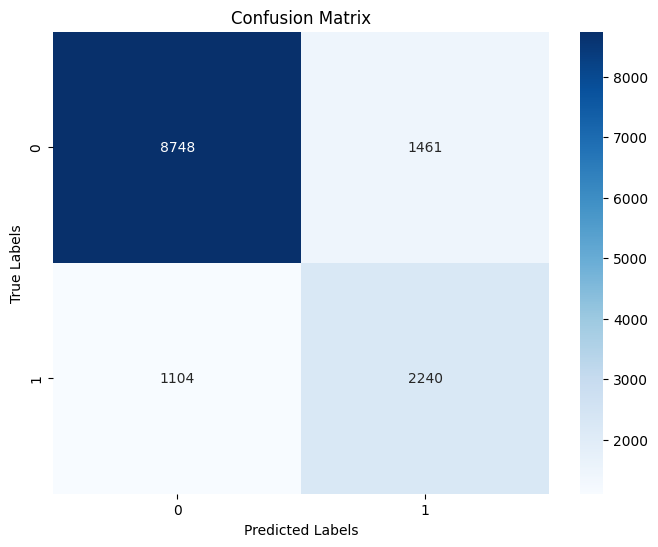

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


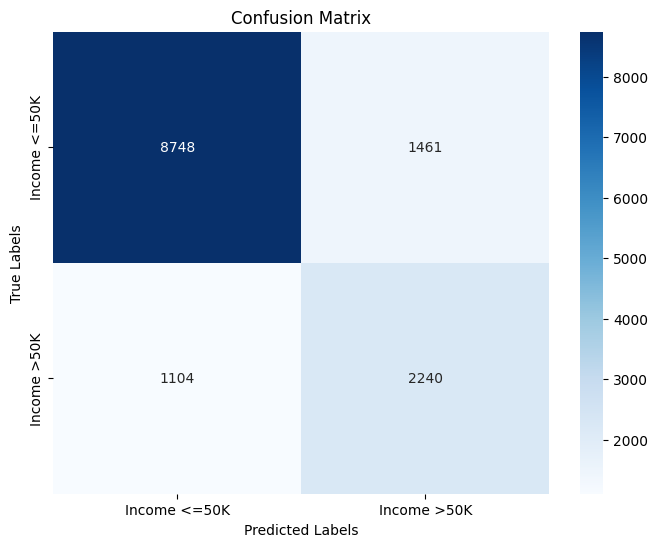

In [55]:
# Define class labels
class_labels = ['Income <=50K', 'Income >50K']

# Plot confusion matrix with custom class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


    Random Forest
    

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)




Random Forest Classifier:
              precision    recall  f1-score   support

       False       0.88      0.92      0.90     10209
        True       0.72      0.63      0.67      3344

    accuracy                           0.85     13553
   macro avg       0.80      0.77      0.79     13553
weighted avg       0.84      0.85      0.84     13553

Accuracy - Random Forest Classifier: 0.8484468383383753


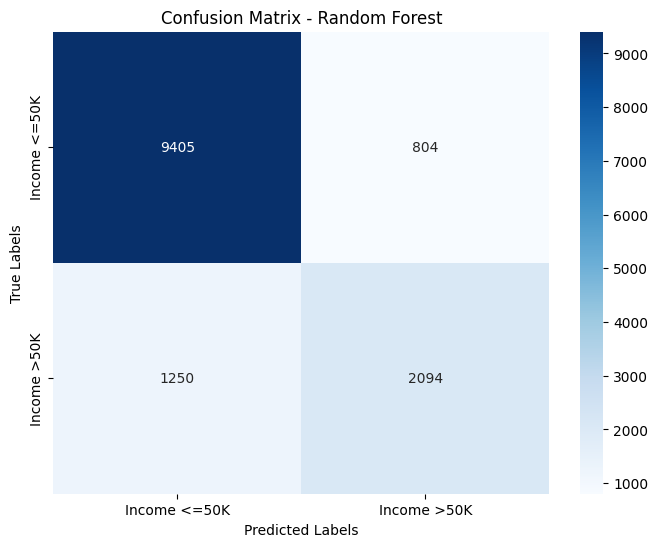

In [57]:
# Evaluate the model
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
random_forest_classification_report = classification_report(y_test, y_pred_rf)
from sklearn.metrics import accuracy_score

# Calculate accuracy score for Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy - Random Forest Classifier:", accuracy_rf)

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [58]:
# Calculate precision
precision_rf = precision_score(y_test, y_pred_rf)

# Calculate recall
recall_rf = recall_score(y_test, y_pred_rf)

# Calculate F1-score
f1_rf = f1_score(y_test, y_pred_rf)

# Print the results
print("Precision - Random Forest Classifier:", precision_rf)
print("Recall - Random Forest Classifier:", recall_rf)
print("F1-score - Random Forest Classifier:", f1_rf)

Precision - Random Forest Classifier: 0.722567287784679
Recall - Random Forest Classifier: 0.6261961722488039
F1-score - Random Forest Classifier: 0.6709388016661326


support vector machine

decision Tree classifier


Decision Tree Classifier:
              precision    recall  f1-score   support

       False       0.87      0.87      0.87     10209
        True       0.61      0.60      0.60      3344

    accuracy                           0.81     13553
   macro avg       0.74      0.74      0.74     13553
weighted avg       0.81      0.81      0.81     13553

Accuracy - Decision Tree Classifier: 0.8057256695934479
Confusion Matrix - Decision Tree Classifier:


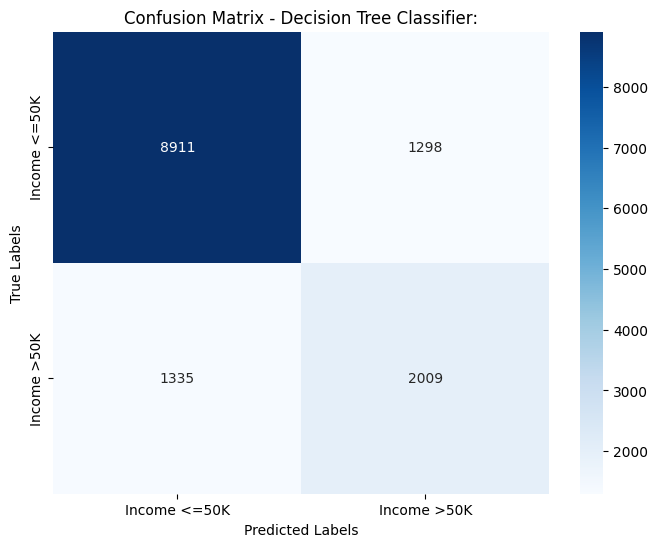

Precision - Decision Tree Classifier: 0.6074992440278197
Recall - Decision Tree Classifier: 0.6007775119617225
F1-score - Decision Tree Classifier: 0.6041196812509397


In [59]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
decision_tree_classification_report = classification_report(y_test, y_pred_dt)
# Calculate accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy - Decision Tree Classifier:", accuracy_dt)

# Print confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix - Decision Tree Classifier:")
#conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Decision Tree Classifier:")
plt.show()

# Calculate precision
precision_dt = precision_score(y_test, y_pred_dt)

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt)

# Calculate F1-score
f1_dt = f1_score(y_test, y_pred_dt)

# Print the results
print("Precision - Decision Tree Classifier:", precision_dt)
print("Recall - Decision Tree Classifier:", recall_dt)
print("F1-score - Decision Tree Classifier:", f1_dt)

lightgbm

[LightGBM] [Info] Number of positive: 21240, number of negative: 23764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 45004, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471958 -> initscore=-0.112286
[LightGBM] [Info] Start training from score -0.112286
LightGBM Classifier:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91     10209
        True       0.78      0.64      0.70      3344

    accuracy                           0.87     13553
   macro avg       0.83      0.79      0.81     13553
weighted avg       0.86      0.87      0.86     13553

Accuracy - LightGBM Classifier: 0.8657861728030695


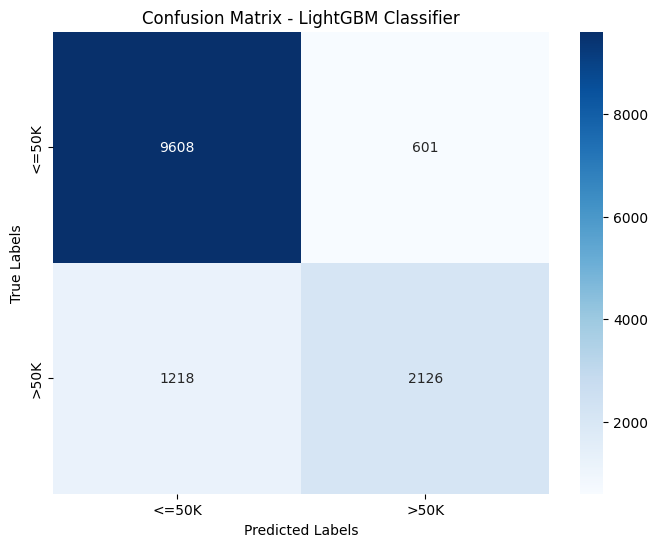

Precision - LightGBM Classifier: 0.7796112944627797
Recall - LightGBM Classifier: 0.6357655502392344
F1-score - LightGBM Classifier: 0.7003788502717839


In [60]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Create LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the model
print("LightGBM Classifier:")
print(classification_report(y_test, y_pred_lgb))
lightgbm_classification_report =classification_report(y_test, y_pred_lgb)
# Calculate accuracy score
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("Accuracy - LightGBM Classifier:", accuracy_lgb)

# Print confusion matrix as heatmap
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - LightGBM Classifier")
plt.show()


# Calculate precision
precision_lgb = precision_score(y_test, y_pred_lgb)

# Calculate recall
recall_lgb = recall_score(y_test, y_pred_lgb)

# Calculate F1-score
f1_lgb = f1_score(y_test, y_pred_lgb)

# Print the results
print("Precision - LightGBM Classifier:", precision_lgb)
print("Recall - LightGBM Classifier:", recall_lgb)
print("F1-score - LightGBM Classifier:", f1_lgb)

naive bayes

Naive Bayes Classifier:
              precision    recall  f1-score   support

       False       0.81      0.94      0.87     10209
        True       0.65      0.32      0.43      3344

    accuracy                           0.79     13553
   macro avg       0.73      0.63      0.65     13553
weighted avg       0.77      0.79      0.76     13553

Accuracy - Naive Bayes Classifier: 0.7894931011584151


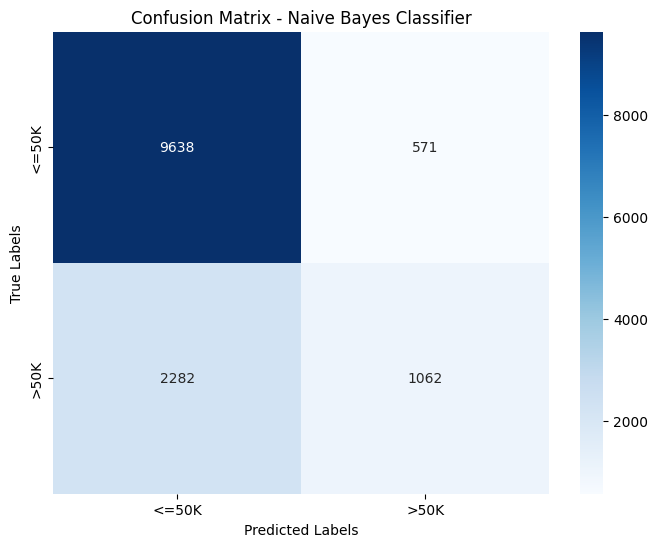

Precision - Naive Bayes Classifier: 0.6503368034292712
Recall - Naive Bayes Classifier: 0.31758373205741625
F1-score - Naive Bayes Classifier: 0.4267631103074141


In [61]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
naive_bayes_classification_report = classification_report(y_test, y_pred_nb)
# Calculate accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy - Naive Bayes Classifier:", accuracy_nb)

# Print confusion matrix as heatmap
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.show()


# Calculate precision
precision_nb = precision_score(y_test, y_pred_nb)

# Calculate recall
recall_nb = recall_score(y_test, y_pred_nb)

# Calculate F1-score
f1_nb = f1_score(y_test, y_pred_nb)

# Print the results
print("Precision - Naive Bayes Classifier:", precision_nb)
print("Recall - Naive Bayes Classifier:", recall_nb)
print("F1-score - Naive Bayes Classifier:", f1_nb)

Gradient Boosting Classifer


Gradient Boosting Classifier:
              precision    recall  f1-score   support

       False       0.90      0.91      0.90     10209
        True       0.71      0.67      0.69      3344

    accuracy                           0.85     13553
   macro avg       0.80      0.79      0.80     13553
weighted avg       0.85      0.85      0.85     13553

Accuracy - Gradient Boosting Classifier: 0.8507341547996754


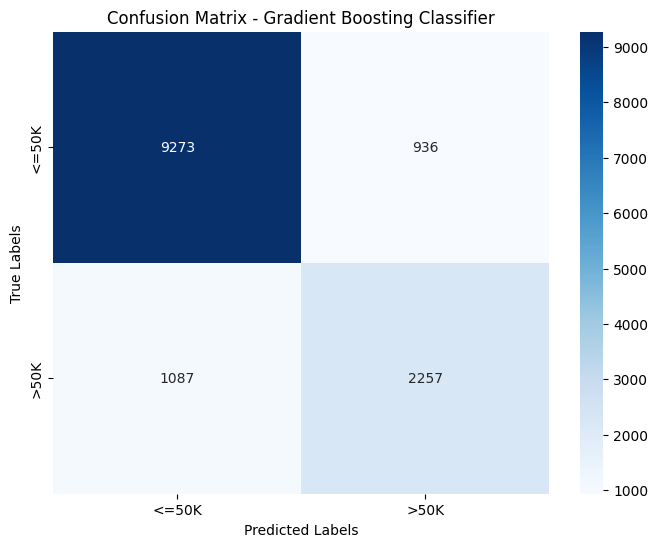

Precision - Gradient Boosting Classifier: 0.7068587535233323
Recall - Gradient Boosting Classifier: 0.6749401913875598
F1-score - Gradient Boosting Classifier: 0.6905308245372495


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))
gradient_boosting_classification_report =classification_report(y_test, y_pred_gb)
# Calculate accuracy score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy - Gradient Boosting Classifier:", accuracy_gb)

# Print confusion matrix as heatmap
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()


# Calculate precision
precision_gb = precision_score(y_test, y_pred_gb)

# Calculate recall
recall_gb = recall_score(y_test, y_pred_gb)

# Calculate F1-score
f1_gb = f1_score(y_test, y_pred_gb)

# Print the results
print("Precision - Gradient Boosting Classifier:", precision_gb)
print("Recall - Gradient Boosting Classifier:", recall_gb)
print("F1-score - Gradient Boosting Classifier:", f1_gb)


ada boost

C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier:
              precision    recall  f1-score   support

       False       0.89      0.89      0.89     10209
        True       0.68      0.68      0.68      3344

    accuracy                           0.84     13553
   macro avg       0.79      0.79      0.79     13553
weighted avg       0.84      0.84      0.84     13553

Accuracy - AdaBoost Classifier: 0.8407732605327234


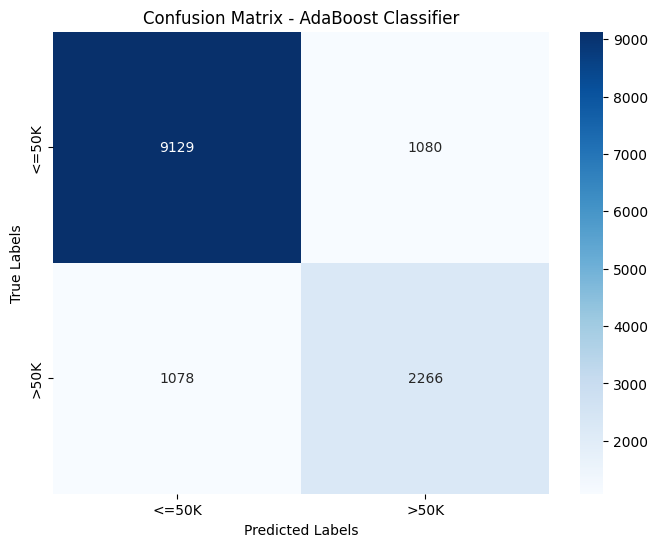

Precision - AdaBoost Classifier: 0.6772265391512253
Recall - AdaBoost Classifier: 0.6776315789473685
F1-score - AdaBoost Classifier: 0.6774289985052316


In [63]:
from sklearn.ensemble import AdaBoostClassifier

# Create AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the model
print("AdaBoost Classifier:")
print(classification_report(y_test, y_pred_adaboost))
adaboost_classification_report =classification_report(y_test, y_pred_adaboost)
# Calculate accuracy score
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy - AdaBoost Classifier:", accuracy_adaboost)

# Print confusion matrix as heatmap
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()


# Calculate precision
precision_adaboost = precision_score(y_test, y_pred_adaboost)

# Calculate recall
recall_adaboost = recall_score(y_test, y_pred_adaboost)

# Calculate F1-score
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Print the results
print("Precision - AdaBoost Classifier:", precision_adaboost)
print("Recall - AdaBoost Classifier:", recall_adaboost)
print("F1-score - AdaBoost Classifier:", f1_adaboost)


In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the testing data
y_pred_ab = adaboost_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
f1_ab = f1_score(y_test, y_pred_ab)

# Print the evaluation metrics
print("Accuracy (AdaBoost):", accuracy_ab)
print("Precision (AdaBoost):", precision_ab)
print("Recall (AdaBoost):", recall_ab)
print("F1-Score (AdaBoost):", f1_ab)


C:\Users\dellG15\Documents\PredictingIncomeClass\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (AdaBoost): 0.8407732605327234
Precision (AdaBoost): 0.6772265391512253
Recall (AdaBoost): 0.6776315789473685
F1-Score (AdaBoost): 0.6774289985052316


xg boost

XGBoost Classifier:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91     10209
        True       0.77      0.64      0.70      3344

    accuracy                           0.86     13553
   macro avg       0.83      0.79      0.81     13553
weighted avg       0.86      0.86      0.86     13553

Accuracy - XGBoost Classifier: 0.8640153471556113


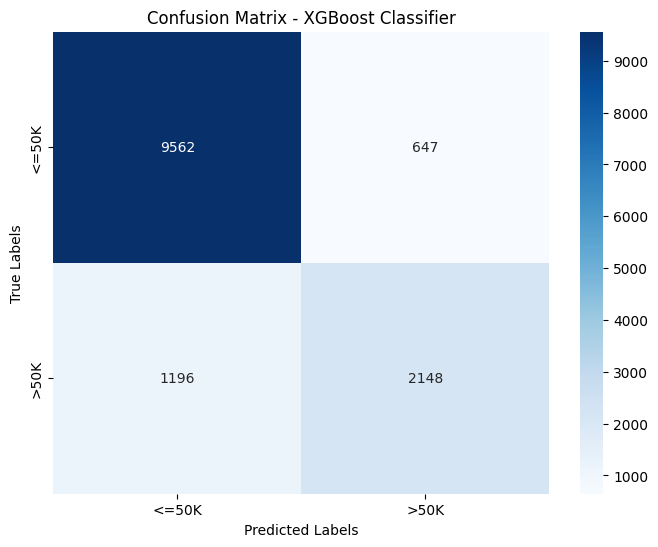

Precision - XGBoost Classifier: 0.768515205724508
Recall - XGBoost Classifier: 0.6423444976076556
F1-score - XGBoost Classifier: 0.6997882391268936


In [65]:
import xgboost as xgb

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))
xgboost_classification_report = classification_report(y_test, y_pred_xgb)
# Calculate accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy - XGBoost Classifier:", accuracy_xgb)

# Print confusion matrix as heatmap
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


# Calculate precision
precision_xgb = precision_score(y_test, y_pred_xgb)

# Calculate recall
recall_xgb = recall_score(y_test, y_pred_xgb)

# Calculate F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the results
print("Precision - XGBoost Classifier:", precision_xgb)
print("Recall - XGBoost Classifier:", recall_xgb)
print("F1-score - XGBoost Classifier:", f1_xgb)

K Nearest Neighbors

K Nearest Neighbors Classifier:
              precision    recall  f1-score   support

       False       0.83      0.72      0.77     10209
        True       0.39      0.54      0.46      3344

    accuracy                           0.68     13553
   macro avg       0.61      0.63      0.61     13553
weighted avg       0.72      0.68      0.69     13553

Accuracy - K Nearest Neighbors Classifier: 0.6791854202021692


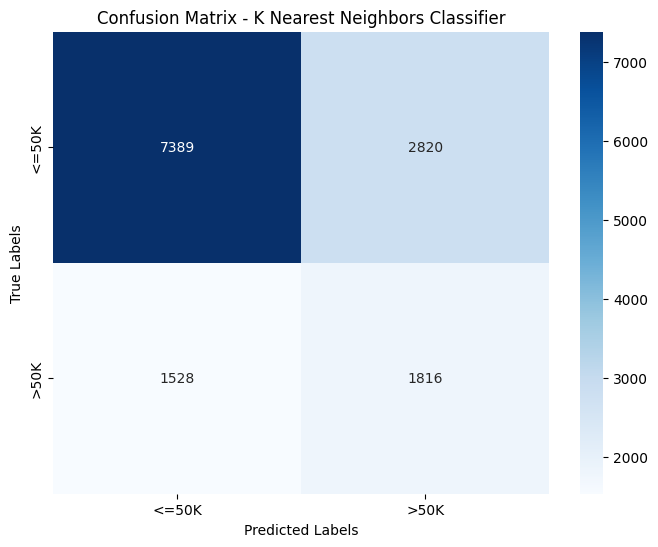

Precision - K Nearest Neighbors Classifier: 0.3917169974115617
Recall - K Nearest Neighbors Classifier: 0.5430622009569378
F1-score - K Nearest Neighbors Classifier: 0.45513784461152884


In [66]:
from sklearn.neighbors import KNeighborsClassifier

# Create K Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
print("K Nearest Neighbors Classifier:")
print(classification_report(y_test, y_pred_knn))
k_nearest_classifier_classification_report = classification_report(y_test, y_pred_knn)
# Calculate accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy - K Nearest Neighbors Classifier:", accuracy_knn)

# Print confusion matrix as heatmap
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - K Nearest Neighbors Classifier")
plt.show()



# Calculate precision
precision_knn = precision_score(y_test, y_pred_knn)

# Calculate recall
recall_knn = recall_score(y_test, y_pred_knn)

# Calculate F1-score
f1_knn = f1_score(y_test, y_pred_knn)

# Print the results
print("Precision - K Nearest Neighbors Classifier:", precision_knn)
print("Recall - K Nearest Neighbors Classifier:", recall_knn)
print("F1-score - K Nearest Neighbors Classifier:", f1_knn)

 Bagging classifier)

Bagging Classifier:
              precision    recall  f1-score   support

       False       0.87      0.92      0.90     10209
        True       0.71      0.57      0.64      3344

    accuracy                           0.84     13553
   macro avg       0.79      0.75      0.77     13553
weighted avg       0.83      0.84      0.83     13553

Accuracy - Bagging Classifier: 0.8378218844536265


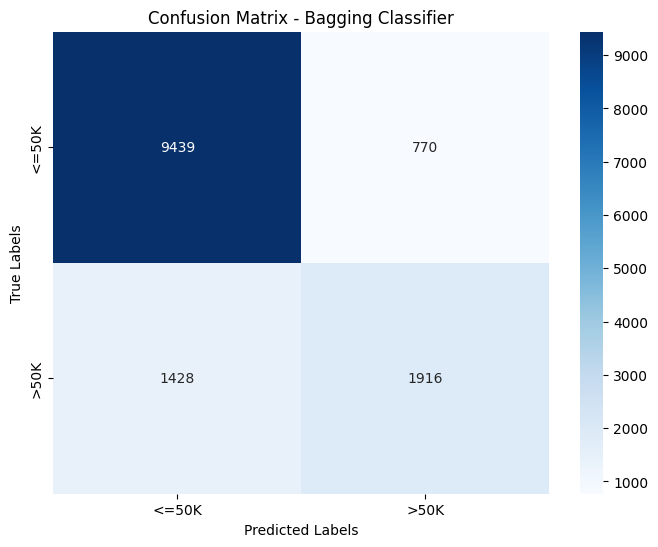

Precision - Bagging Classifier: 0.7133283693224125
Recall - Bagging Classifier: 0.5729665071770335
F1-score - Bagging Classifier: 0.6354892205638474


In [67]:
from sklearn.ensemble import BaggingClassifier

# Create Bagging classifier
bagging_classifier = BaggingClassifier(random_state=42)

# Train the model
bagging_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model
print("Bagging Classifier:")
print(classification_report(y_test, y_pred_bagging))
bagging_classifier_classification_report =classification_report(y_test, y_pred_bagging)
# Calculate accuracy score
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy - Bagging Classifier:", accuracy_bagging)

# Print confusion matrix as heatmap
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_labels = ['<=50K', '>50K']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()


# Calculate precision
precision_bagging = precision_score(y_test, y_pred_bagging)

# Calculate recall
recall_bagging = recall_score(y_test, y_pred_bagging)

# Calculate F1-score
f1_bagging = f1_score(y_test, y_pred_bagging)

# Print the results
print("Precision - Bagging Classifier:", precision_bagging)
print("Recall - Bagging Classifier:", recall_bagging)
print("F1-score - Bagging Classifier:", f1_bagging)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Support Vector Machine'),
  Text(3, 0, 'Decision Tree'),
  Text(4, 0, 'LightGBM'),
  Text(5, 0, 'Naive Bayes'),
  Text(6, 0, 'Gradient Boosting'),
  Text(7, 0, 'AdaBoost'),
  Text(8, 0, 'XGBoost'),
  Text(9, 0, 'K Nearest Neighbors'),
  Text(10, 0, 'Bagging Classifier')])

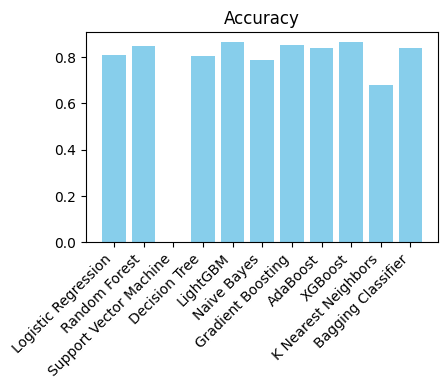

In [68]:
import matplotlib.pyplot as plt
accuracy_svm=0
precision_svm=0
recall_svm=0
f1_svm=0
# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_ab, accuracy_xgb, accuracy_knn, accuracy_bagging]
#precisions = [precision_logistic, precision_rf, precision_svm, precision_dt, precision_lgb, precision_nb, precision_gb, precision_ab, precision_xgb, precision_knn, precision_bagging]
#recalls = [recall_logistic, recall_rf, recall_svm, recall_dt, recall_lgb, recall_nb, recall_gb, recall_ab, recall_xgb, recall_knn, recall_bagging]
#f1_scores = [f1_logistic, f1_rf, f1_svm, f1_dt, f1_lgb, f1_nb, f1_gb, f1_ab, f1_xgb, f1_knn, f1_bagging]

# Plotting the evaluation metrics
plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

#Precision
#plt.subplot(2, 2, 2)
#plt.bar(models, precisions, color='lightgreen')
#plt.title('Precision')
#plt.xticks(rotation=45, ha='right')

## Recall
#plt.subplot(2, 2, 3)
#plt.bar(models, recalls, color='salmon')
#plt.title('Recall')
#plt.xticks(rotation=45, ha='right')
#
## F1-score
#plt.subplot(2, 2, 4)
#plt.bar(models, f1_scores, color='gold')
#plt.title('F1-Score')
#plt.xticks(rotation=45, ha='right')
#
#plt.tight_layout()
#plt.show()


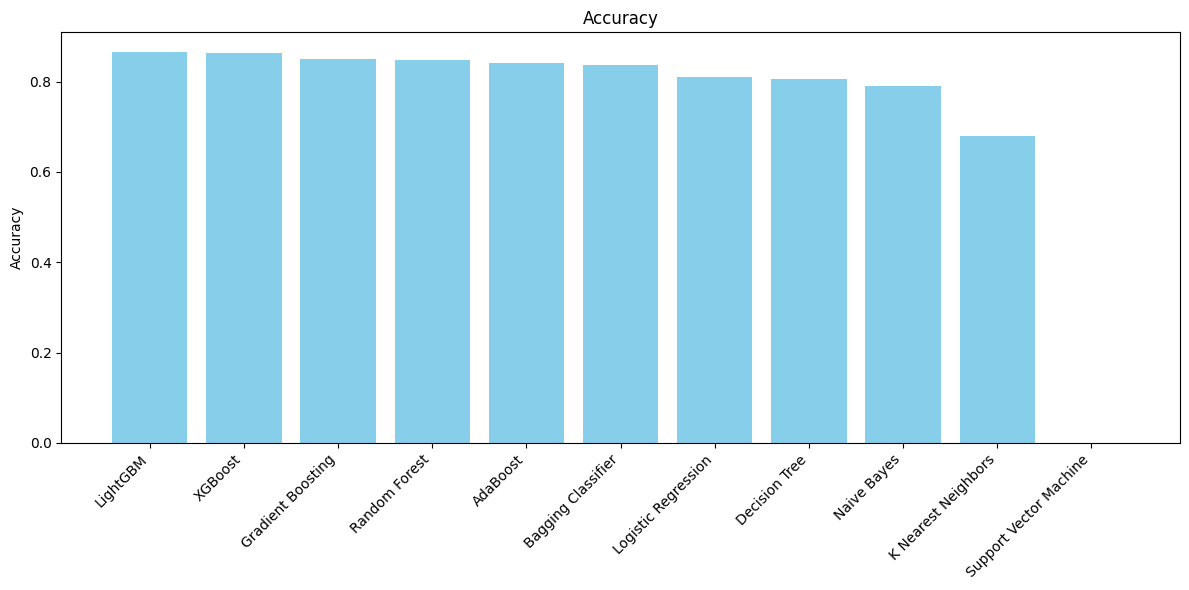

In [69]:
import matplotlib.pyplot as plt

# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_ab, accuracy_xgb, accuracy_knn, accuracy_bagging]

# Sort models and accuracies based on accuracies
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))

# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_accuracies, color='skyblue')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


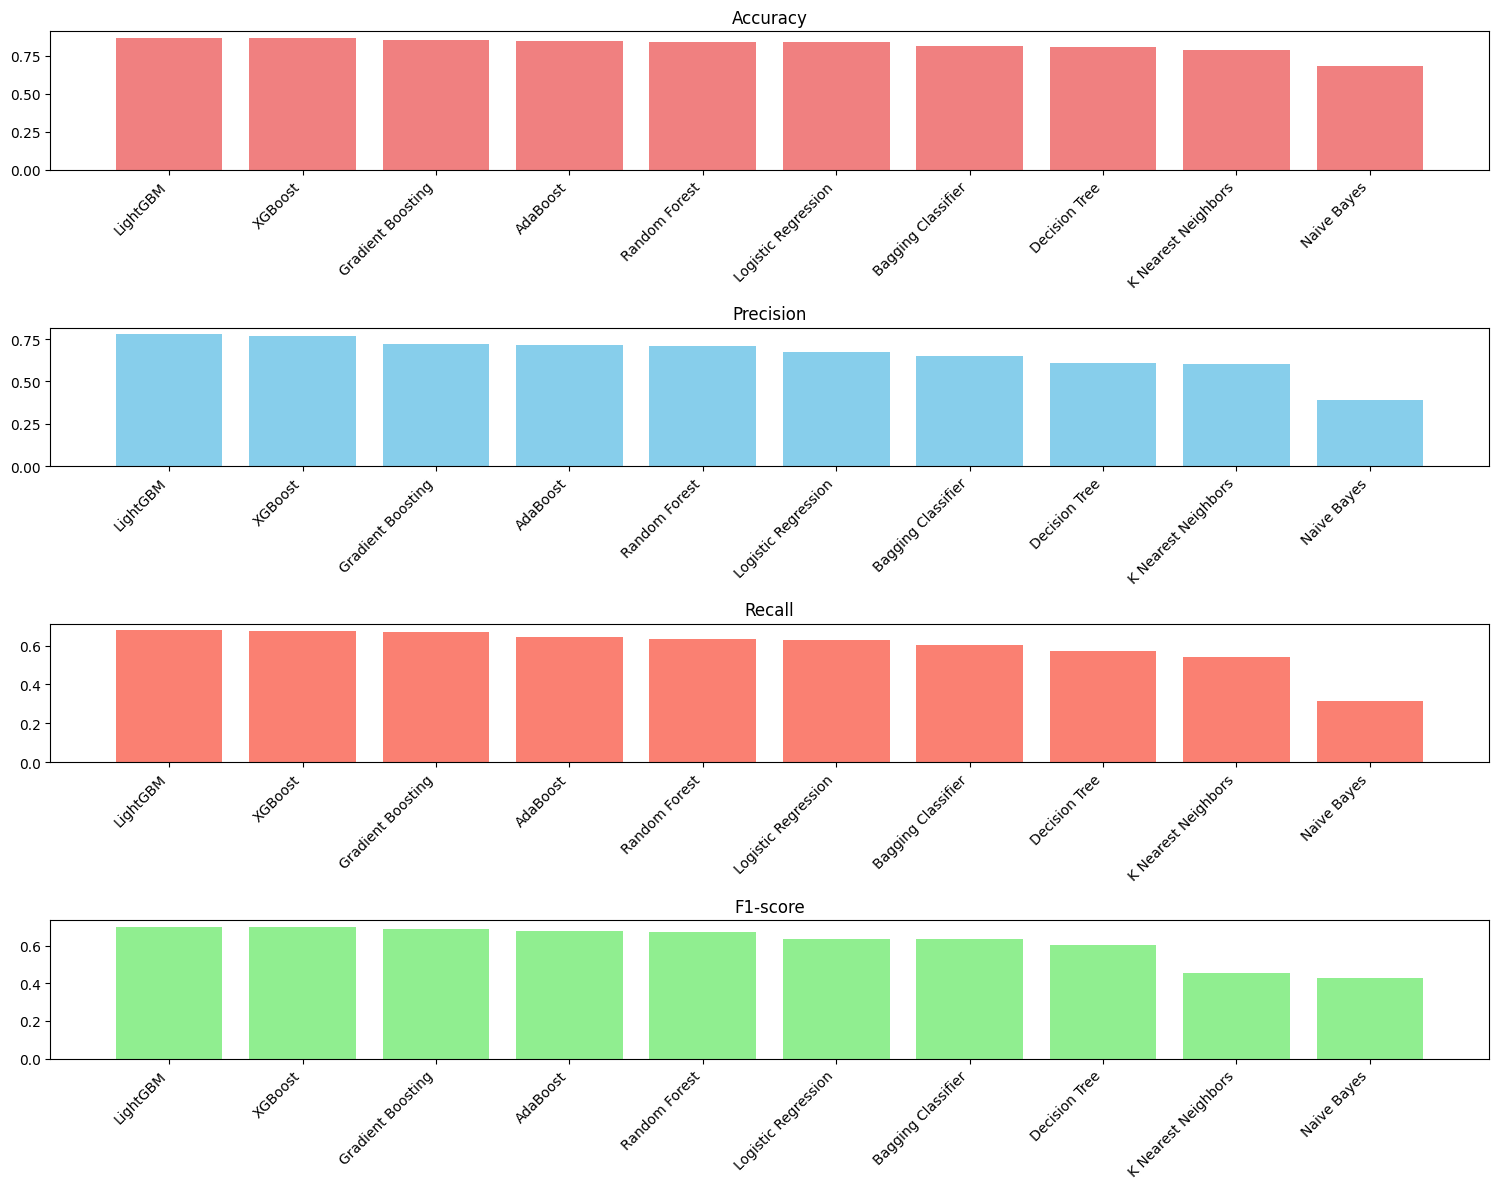

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_adaboost, accuracy_xgb, accuracy_knn, accuracy_bagging]
precisions = [precision_logistic, precision_rf, precision_dt, precision_lgb, precision_nb, precision_gb, precision_adaboost, precision_xgb, precision_knn, precision_bagging]
recalls = [recall_logistic, recall_rf, recall_dt, recall_lgb, recall_nb, recall_gb, recall_adaboost, recall_xgb, recall_knn, recall_bagging]
f1_scores = [f1_logistic, f1_rf, f1_dt, f1_lgb, f1_nb, f1_gb, f1_adaboost, f1_xgb, f1_knn, f1_bagging]

# Sort models and metrics based on F1-score
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))
sorted_models, sorted_precisions = zip(*sorted(zip(models, precisions), key=lambda x: x[1], reverse=True))
sorted_models, sorted_recalls = zip(*sorted(zip(models, recalls), key=lambda x: x[1], reverse=True))
sorted_models, sorted_f1_scores = zip(*sorted(zip(models, f1_scores), key=lambda x: x[1], reverse=True))

# Plotting the evaluation metrics
plt.figure(figsize=(15, 12))

# Accuracy
plt.subplot(4, 1, 1)
plt.bar(sorted_models, sorted_accuracies, color='lightcoral')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

# Precision
plt.subplot(4, 1, 2)
plt.bar(sorted_models, sorted_precisions, color='skyblue')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

# Recall
plt.subplot(4, 1, 3)
plt.bar(sorted_models, sorted_recalls, color='salmon')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

# F1-score
plt.subplot(4, 1, 4)
plt.bar(sorted_models, sorted_f1_scores, color='lightgreen')
plt.title('F1-score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


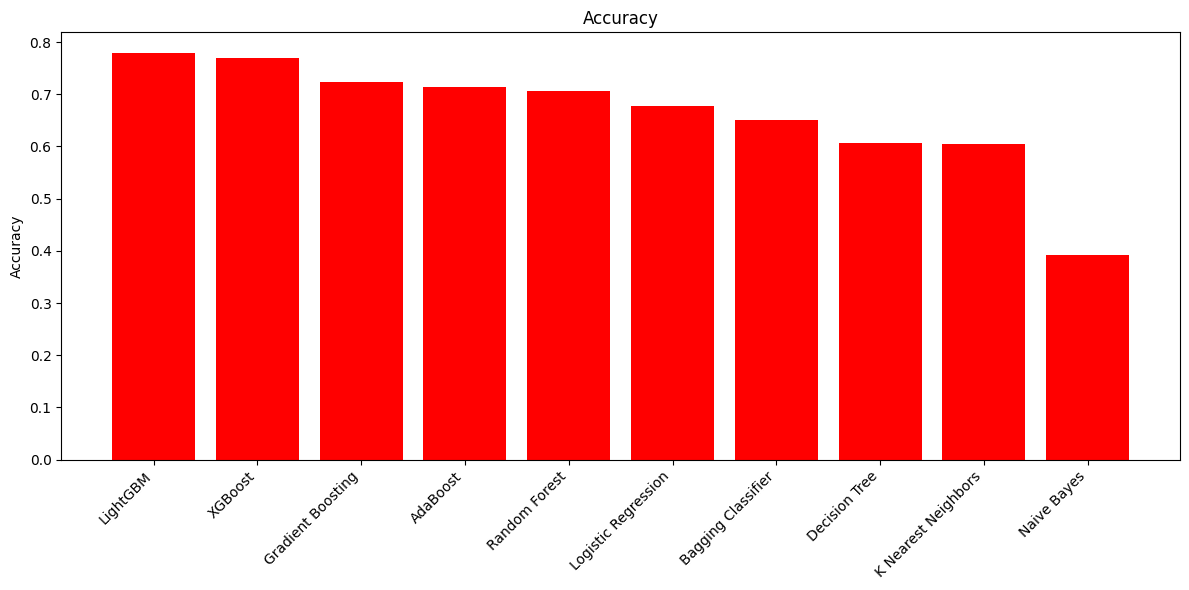

In [71]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_precisions, color='red')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

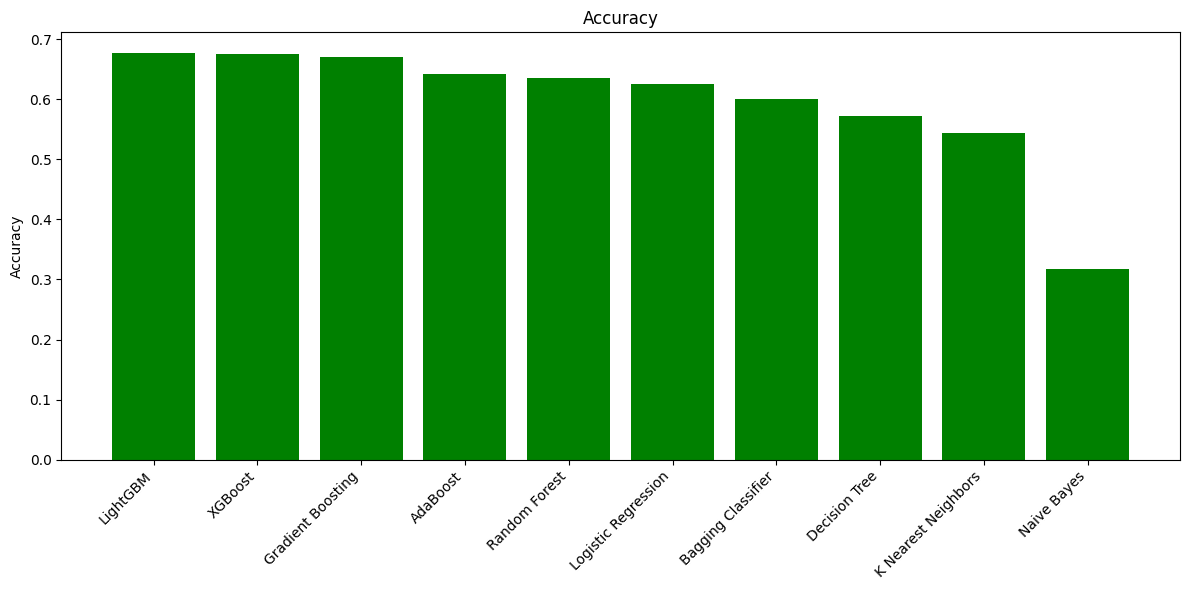

In [72]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_recalls, color='green')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

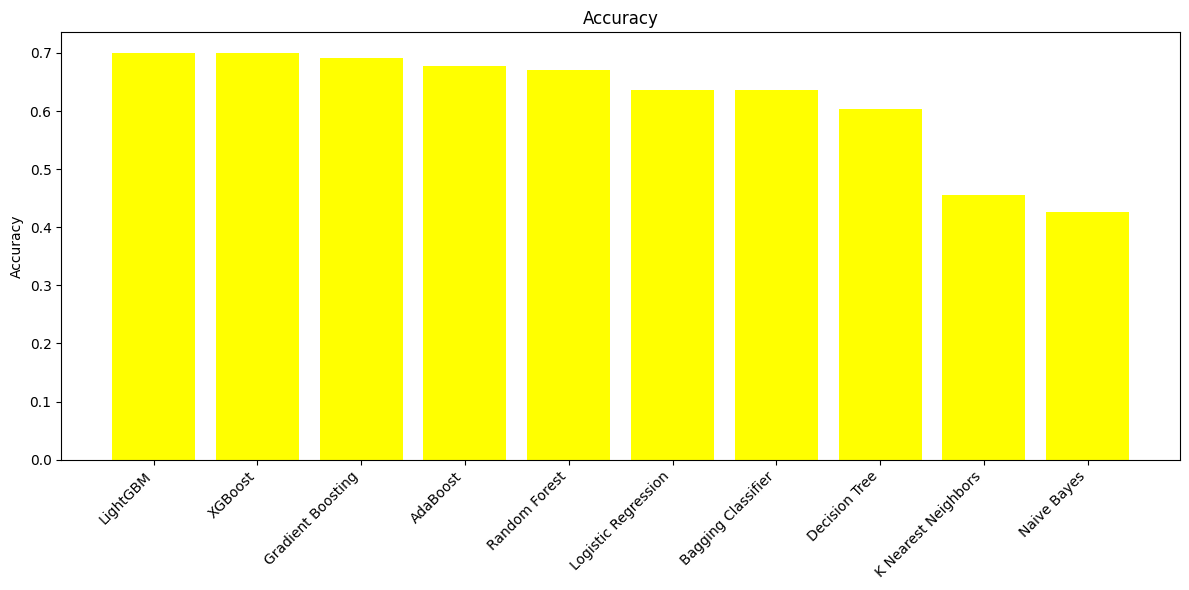

In [73]:
# Plotting the evaluation metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.bar(sorted_models, sorted_f1_scores, color='Yellow')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

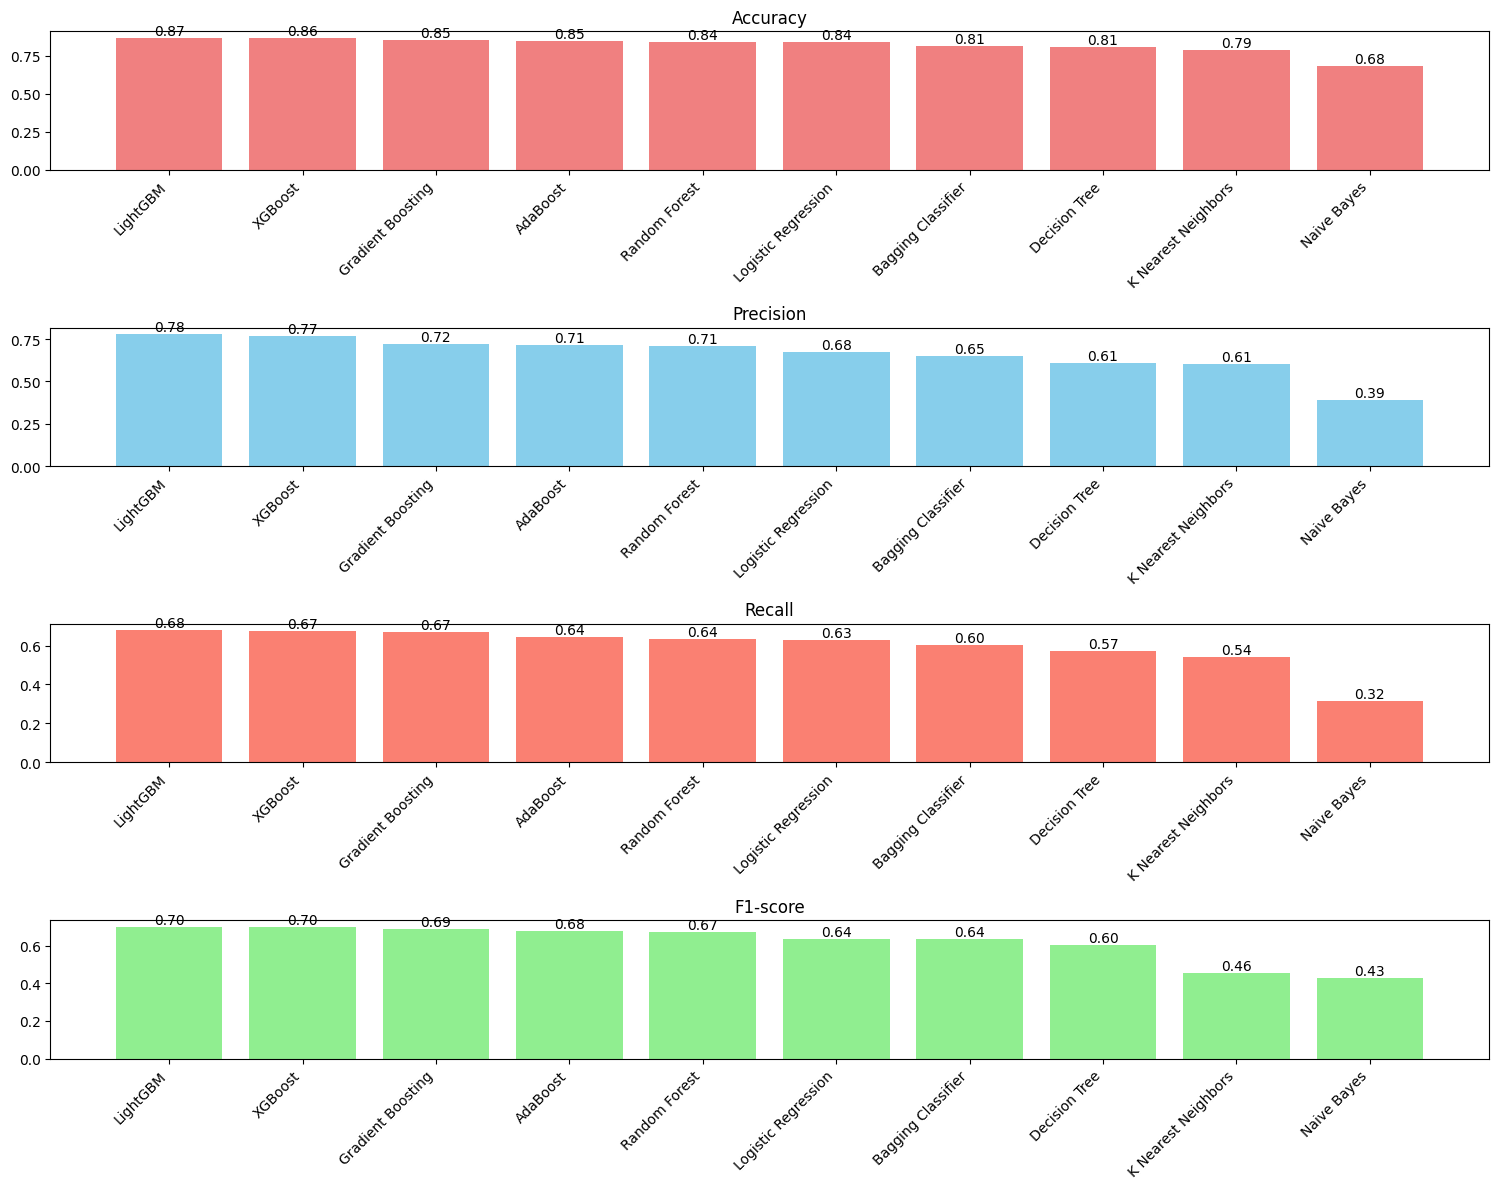

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the evaluation metrics for each model
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'LightGBM', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'XGBoost', 'K Nearest Neighbors', 'Bagging Classifier']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_dt, accuracy_lgb, accuracy_nb, accuracy_gb, accuracy_adaboost, accuracy_xgb, accuracy_knn, accuracy_bagging]
precisions = [precision_logistic, precision_rf, precision_dt, precision_lgb, precision_nb, precision_gb, precision_adaboost, precision_xgb, precision_knn, precision_bagging]
recalls = [recall_logistic, recall_rf, recall_dt, recall_lgb, recall_nb, recall_gb, recall_adaboost, recall_xgb, recall_knn, recall_bagging]
f1_scores = [f1_logistic, f1_rf, f1_dt, f1_lgb, f1_nb, f1_gb, f1_adaboost, f1_xgb, f1_knn, f1_bagging]

# Sort models and metrics based on F1-score
sorted_models, sorted_accuracies = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))
sorted_models, sorted_precisions = zip(*sorted(zip(models, precisions), key=lambda x: x[1], reverse=True))
sorted_models, sorted_recalls = zip(*sorted(zip(models, recalls), key=lambda x: x[1], reverse=True))
sorted_models, sorted_f1_scores = zip(*sorted(zip(models, f1_scores), key=lambda x: x[1], reverse=True))

# Plotting the evaluation metrics
plt.figure(figsize=(15, 12))

# Accuracy
plt.subplot(4, 1, 1)
bars = plt.bar(sorted_models, sorted_accuracies, color='lightcoral')
plt.title('Accuracy')
plt.xticks(rotation=45, ha='right')

for bar, acc in zip(bars, sorted_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom')

# Precision
plt.subplot(4, 1, 2)
bars = plt.bar(sorted_models, sorted_precisions, color='skyblue')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')

for bar, prec in zip(bars, sorted_precisions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{prec:.2f}', ha='center', va='bottom')

# Recall
plt.subplot(4, 1, 3)
bars = plt.bar(sorted_models, sorted_recalls, color='salmon')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')

for bar, rec in zip(bars, sorted_recalls):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{rec:.2f}', ha='center', va='bottom')

# F1-score
plt.subplot(4, 1, 4)
bars = plt.bar(sorted_models, sorted_f1_scores, color='lightgreen')
plt.title('F1-score')
plt.xticks(rotation=45, ha='right')

for bar, f1 in zip(bars, sorted_f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{f1:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [75]:
all_classification_report=[logistic_regression_classification_report,
random_forest_classification_report ,
decision_tree_classification_report ,
lightgbm_classification_report ,
naive_bayes_classification_report,
gradient_boosting_classification_report, 
adaboost_classification_report ,
xgboost_classification_report ,
k_nearest_classifier_classification_report]



In [76]:
all_classification_report = {
    'logistic_regression': logistic_regression_classification_report,
    'random_forest': random_forest_classification_report,
    'decision_tree': decision_tree_classification_report,
    'lightgbm': lightgbm_classification_report,
    'naive_bayes': naive_bayes_classification_report,
    'gradient_boosting': gradient_boosting_classification_report,
    'adaboost': adaboost_classification_report,
    'xgboost': xgboost_classification_report,
    'k_nearest_classifier': k_nearest_classifier_classification_report
}

for name, report in all_classification_report.items():
    print(f"Variable name: {name}")
    print(report)


Variable name: logistic_regression
              precision    recall  f1-score   support

       False       0.89      0.86      0.87     10209
        True       0.61      0.67      0.64      3344

    accuracy                           0.81     13553
   macro avg       0.75      0.76      0.75     13553
weighted avg       0.82      0.81      0.81     13553

Variable name: random_forest
              precision    recall  f1-score   support

       False       0.88      0.92      0.90     10209
        True       0.72      0.63      0.67      3344

    accuracy                           0.85     13553
   macro avg       0.80      0.77      0.79     13553
weighted avg       0.84      0.85      0.84     13553

Variable name: decision_tree
              precision    recall  f1-score   support

       False       0.87      0.87      0.87     10209
        True       0.61      0.60      0.60      3344

    accuracy                           0.81     13553
   macro avg       0.74      0.74  

In [77]:
print(logistic_regression_classification_report)

              precision    recall  f1-score   support

       False       0.89      0.86      0.87     10209
        True       0.61      0.67      0.64      3344

    accuracy                           0.81     13553
   macro avg       0.75      0.76      0.75     13553
weighted avg       0.82      0.81      0.81     13553

